## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 3.เขียนโปรแกรมสำหรับสร้างตัวจำแนกกำลังสอง>
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจง
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [20]:
# กำหนดค่าพารามิเตอร์ของการแจกแจง
mean_class_1 = 2
var_class_1 = 1
mean_class_2 = 5
var_class_2 = 5
prior_class_1 = 0.5  # Prior probability for class 1
prior_class_2 = 0.5  # Prior probability for class 2

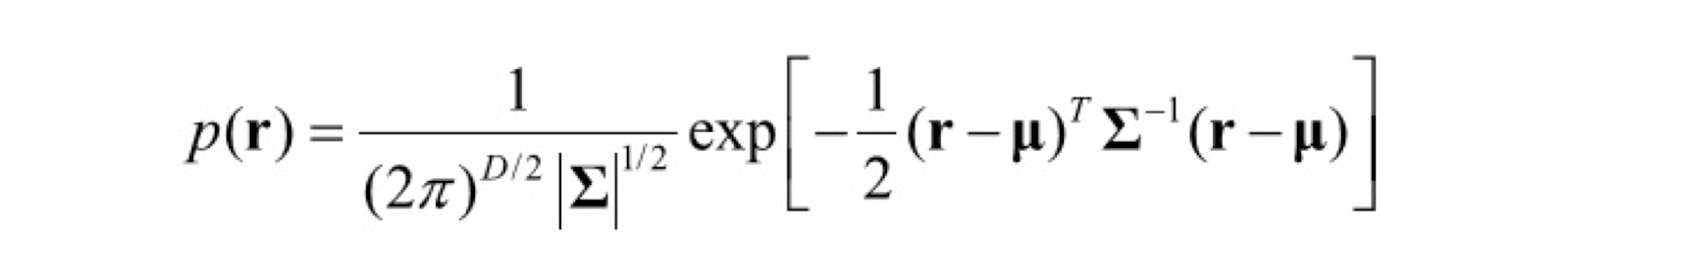

In [21]:
# ฟังก์ชันสำหรับคำนวณ likelihood (QDA)
def likelihood_qda(x, mean, var):
    return norm.pdf(x, mean, np.sqrt(var))

# ฟังก์ชันสำหรับคำนวณ posterior
def posterior_qda(x, mean, var, prior):
    return likelihood_qda(x, mean, var) * prior

# สร้างกราฟสำหรับ likelihood, posterior และ decision boundary
x_values = np.linspace(-5, 12, 500)

In [22]:
# คำนวณ likelihood
likelihood_class_1 = likelihood_qda(x_values, mean_class_1, var_class_1)
likelihood_class_2 = likelihood_qda(x_values, mean_class_2, var_class_2)

# คำนวณ posterior
posterior_class_1 = posterior_qda(x_values, mean_class_1, var_class_1, prior_class_1)
posterior_class_2 = posterior_qda(x_values, mean_class_2, var_class_2, prior_class_2)

# Decision boundary คือจุดที่ posterior ของทั้งสองคลาสเท่ากัน
decision_boundary = x_values[np.argmin(np.abs(posterior_class_1 - posterior_class_2))]

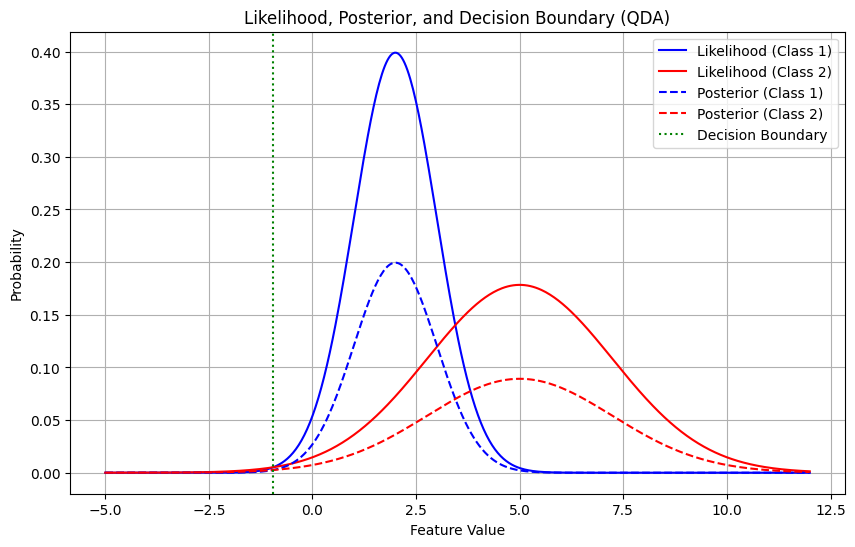

In [23]:

# -------------------- วาดกราฟ --------------------
plt.figure(figsize=(10, 6))

# Plot likelihood
plt.plot(x_values, likelihood_class_1, label="Likelihood (Class 1)", color='blue')
plt.plot(x_values, likelihood_class_2, label="Likelihood (Class 2)", color='red')

# Plot posterior
plt.plot(x_values, posterior_class_1, label="Posterior (Class 1)", linestyle='--', color='blue')
plt.plot(x_values, posterior_class_2, label="Posterior (Class 2)", linestyle='--', color='red')

# Highlight decision boundary
plt.axvline(decision_boundary, color='green', linestyle=':', label='Decision Boundary')

# Labels and title
plt.title('Likelihood, Posterior, and Decision Boundary (QDA)')
plt.xlabel('Feature Value')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# ------------------ สุ่มตัวอย่างเพื่อนำมาคำนวณพารามิเตอร์ -------------------

# สุ่มตัวอย่างจากการแจกแจงปกติ
np.random.seed(42)
samples_class_1 = np.random.normal(mean_class_1, np.sqrt(var_class_1), 100)
samples_class_2 = np.random.normal(mean_class_2, np.sqrt(var_class_2), 100)

In [25]:
# คำนวณ mean และ variance จากตัวอย่างที่ได้
mean_class_1_sample = np.mean(samples_class_1)
var_class_1_sample = np.var(samples_class_1)
mean_class_2_sample = np.mean(samples_class_2)
var_class_2_sample = np.var(samples_class_2)

# คำนวณ likelihood และ posterior จากตัวอย่างที่สุ่มได้
likelihood_class_1_sample = likelihood_qda(x_values, mean_class_1_sample, var_class_1_sample)
likelihood_class_2_sample = likelihood_qda(x_values, mean_class_2_sample, var_class_2_sample)

posterior_class_1_sample = posterior_qda(x_values, mean_class_1_sample, var_class_1_sample, prior_class_1)
posterior_class_2_sample = posterior_qda(x_values, mean_class_2_sample, var_class_2_sample, prior_class_2)

# คำนวณ decision boundary จากตัวอย่าง
decision_boundary_sample = x_values[np.argmin(np.abs(posterior_class_1_sample - posterior_class_2_sample))]


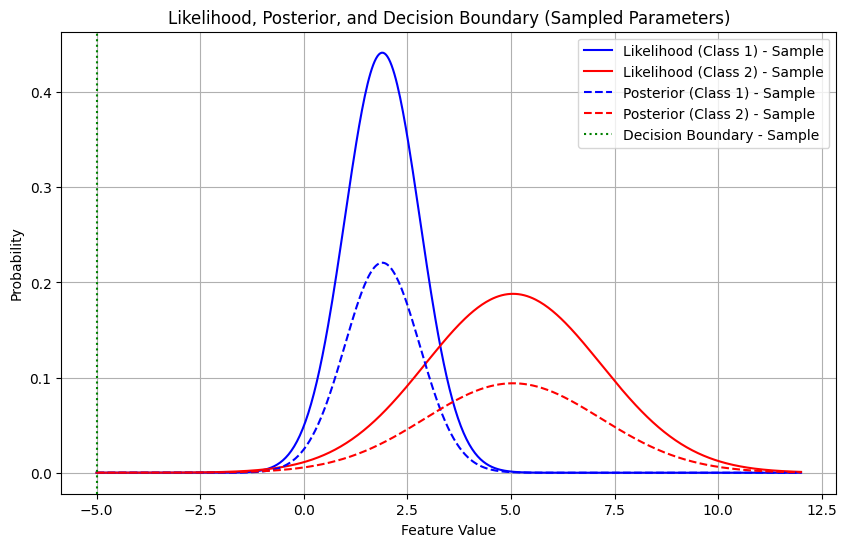

In [26]:
# -------------------- วาดกราฟจากการสุ่มตัวอย่าง --------------------
plt.figure(figsize=(10, 6))

# Plot likelihood จากตัวอย่างที่สุ่ม
plt.plot(x_values, likelihood_class_1_sample, label="Likelihood (Class 1) - Sample", color='blue')
plt.plot(x_values, likelihood_class_2_sample, label="Likelihood (Class 2) - Sample", color='red')

# Plot posterior จากตัวอย่างที่สุ่ม
plt.plot(x_values, posterior_class_1_sample, label="Posterior (Class 1) - Sample", linestyle='--', color='blue')
plt.plot(x_values, posterior_class_2_sample, label="Posterior (Class 2) - Sample", linestyle='--', color='red')

# Highlight decision boundary จากการสุ่ม
plt.axvline(decision_boundary_sample, color='green', linestyle=':', label='Decision Boundary - Sample')

# Labels and title
plt.title('Likelihood, Posterior, and Decision Boundary (Sampled Parameters)')
plt.xlabel('Feature Value')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()